In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1.

In [7]:
from fastai.conv_learner import *
from fastai.models import darknet
from pathlib import Path

In [8]:
PATH = Path('data/imagenet')
PATH_TRAIN = PATH/'train'

In [5]:
# sz = 256
# bs = 32
# darknet53 = darknet.darknet_53()
# tfms = tfms_from_model(darknet53, sz)
# model_data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, val_name='train')
# learner = ConvLearner.from_model_data(darknet53, model_data)

In [9]:
learner.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [12]:
model_data

In [13]:
learner.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [14]:
learner.crit = F.cross_entropy

In [15]:
learner.crit

<function torch.nn.functional.cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

## 2.

Checking behavior of `.pretrained` in fastai/conv_learner.py. Looking at number of FC layers at the end of a stock PyTorch model, compared to loading through FastAI:

In [9]:
from torchvision.models import resnet18

In [10]:
resnet18

<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>

In [11]:
resnet18 = resnet18()

In [3]:
# resnet18

1 linear layer at the end.

In [18]:
from fastai.conv_learner import *

In [19]:
resnet18

<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>

What fastai originally imports is the resnet18 constructor function from torchvision.models.resnet. Good to know.

In [23]:
learner = ConvLearner.from_model_data(resnet18(), model_data)

In [2]:
# learner

In [20]:
from pathlib import Path
PATH = Path('data/cifar10')

In [21]:
sz = 32
bs = 64
tfms = tfms_from_model(resnet18, sz)
model_data = ImageClassifierData.from_paths(PATH, bs, tfms=tfms, val_name='test')

In [10]:
learner = ConvLearner.pretrained(resnet18, model_data)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/ubuntu/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 65104058.86it/s]


In [1]:
# learner

Right. fastai strips the FC layer and its associated pooling layers, and replaces them with adaptive pooling and 2 linear layers with batchNorm and dropout; with a LogSoftmax output layer.

In [12]:
from fastai.models import darknet

In [13]:
darknet.darknet_53

<function fastai.models.darknet.darknet_53(num_classes=1000)>

In [14]:
tfms = tfms_from_stats(imagenet_stats, sz)
model_data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, val_name='test')

darknet53 = darknet.darknet_53

In [4]:
# learner = ConvLearner.from_model_data(darknet53(num_classes=10), model_data)
# learner

In [5]:
# learner = ConvLearner.pretrained(darknet53(num_classes=10), model_data)
# learner

## 3.

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.conv_learner import *
from fastai.models import darknet
from pathlib import Path
PATH = Path('data/imagenet')
PATH_TRAIN = PATH/'train'

In [5]:
bs = 32
sz = 256

tfms = tfms_from_stats(imagenet_stats, sz)
model_data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)

darknet53 = darknet.darknet_53

`.from_model_data`

In [7]:
learner = ConvLearner.from_model_data(darknet53(), model_data)

In [11]:
# learner.summary()

head:
```
             ('AdaptiveAvgPool2d-232',
              OrderedDict([('input_shape', [-1, 1024, 14, 14]),
                           ('output_shape', [-1, 1024, 1, 1]),
                           ('nb_params', 0)])),
             ('Flatten-233',
              OrderedDict([('input_shape', [-1, 1024, 1, 1]),
                           ('output_shape', [-1, 1024]),
                           ('nb_params', 0)])),
             ('Linear-234',
              OrderedDict([('input_shape', [-1, 1024]),
                           ('output_shape', [-1, 1000]),
                           ('trainable', True),
                           ('nb_params', 1025000)]))])
```

learner with NLL loss fails Learning-Rate Finder phase due to negative losses:

  4%|▎         | 18/487 [01:26<37:32,  4.80s/it, loss=-0.0191] 

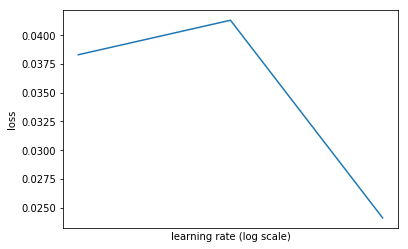

In [14]:
learner.lr_find()
learner.sched.plot()

In [15]:
learner.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

`.pretrained`

In [17]:
learner = ConvLearner.pretrained(darknet53(), model_data)

AttributeError: 'bool' object has no attribute 'dim'

In [ ]:
learner.summary()

In [ ]:
learner.lr_find()
learner.sched.plot()

## Testing Fix

Testing addition of LogSoftmax layer to fastai.models.darknet.Darknet definition

In [1]:
from pathlib import Path
from fastai.conv_learner import *
from fastai.models import darknet

In [2]:
PATH = Path('data/imagenet')

sz = 256; bs=32

tfms = tfms_from_stats(imagenet_stats, sz)
model_data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, val_name='train')

darknet53 = darknet.darknet_53

In [3]:
learner = ConvLearner.from_model_data(darknet53(), model_data)

In [4]:
# learner.summary()

 92%|█████████▏| 448/487 [33:30<02:55,  4.49s/it, loss=28.3]

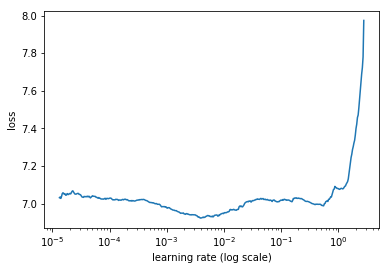

In [5]:
learner.lr_find()
learner.sched.plot()

In [6]:
learner.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 256, 256]),
                           ('output_shape', [-1, 32, 256, 256]),
                           ('trainable', True),
                           ('nb_params', 864)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 32, 256, 256]),
                           ('output_shape', [-1, 32, 256, 256]),
                           ('trainable', True),
                           ('nb_params', 64)])),
             ('LeakyReLU-3',
              OrderedDict([('input_shape', [-1, 32, 256, 256]),
                           ('output_shape', [-1, 32, 256, 256]),
                           ('nb_params', 0)])),
             ('ConvBN-4',
              OrderedDict([('input_shape', [-1, 3, 256, 256]),
                           ('output_shape', [-1, 32, 256, 256]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 32, 256, 

In [7]:
learner.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>